# Cognifyz Data Analyst Internship

## Level 2

### Task 1 : Restaurant Ratings

- Analyze the distribution of aggregate ratings and determine the most common rating range.

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\MIT\\Downloads\\Dataset .csv")
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


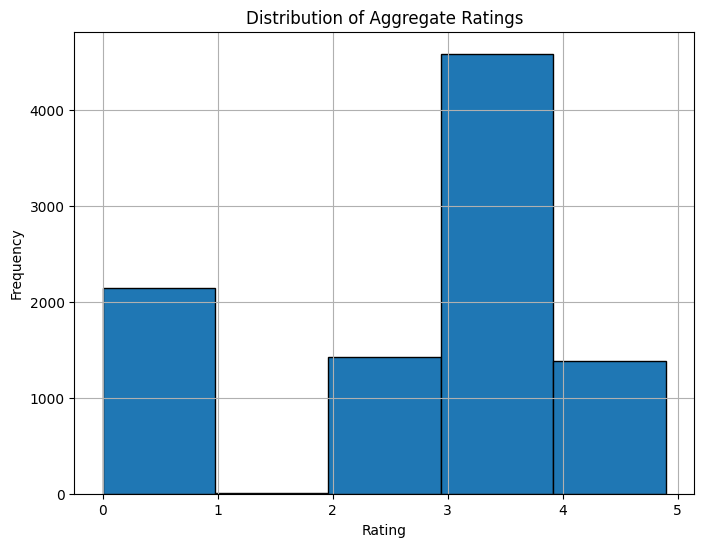

AttributeError: 'tuple' object has no attribute 'value_counts'

In [40]:
import matplotlib.pyplot as plt

# Step 1: Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=5, edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 2: Determine the most common rating range
# Create bins and get the count for each bin
rating_counts, bins = pd.cut(df['Aggregate rating'], bins=5, retbins=True).value_counts().sort_index()

# Identify the most common rating range
most_common_range = rating_counts.idxmax()

# Output the result
print(f"The most common rating range is between {most_common_range.left} and {most_common_range.right}.")

- Calculate the average number of votes received by restaurants.

In [41]:
# Step 1: Calculate the average number of votes
average_votes = df['Votes'].mean()

# Step 2: Output the result
print(f"The average number of votes received by restaurants is {average_votes:.2f}.")

The average number of votes received by restaurants is 156.91.


### Task 2 : Cuisine Combination

- Identify the most common combinations of cuisines in the dataset.

In [42]:
from collections import Counter

# Step 1: Handle missing values by replacing NaN with an empty list
df['Cuisines'] = df['Cuisines'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Step 2: Convert the list of cuisines to a sorted tuple to ensure consistency
df['Cuisine_Combination'] = df['Cuisines'].apply(lambda x: tuple(sorted(x)))

# Step 3: Count the frequency of each unique combination
combination_count = Counter(df['Cuisine_Combination'])

# Step 4: Identify the most common combinations
most_common_combinations = combination_count.most_common(30)

# Output the result
print("Most common combinations of cuisines:")
for combination, count in most_common_combinations:
    print(f"{combination}: {count} occurrences")

Most common combinations of cuisines:
('North Indian',): 936 occurrences
('Chinese', 'North Indian'): 616 occurrences
('Mughlai', 'North Indian'): 394 occurrences
('Chinese',): 354 occurrences
('Fast Food',): 354 occurrences
('Chinese', 'Mughlai', 'North Indian'): 306 occurrences
('Cafe',): 299 occurrences
('Bakery',): 218 occurrences
('Bakery', 'Desserts'): 181 occurrences
('Chinese', 'Fast Food'): 159 occurrences
('Street Food',): 149 occurrences
('Fast Food', 'Pizza'): 142 occurrences
('Chinese', 'North Indian', 'South Indian'): 135 occurrences
('Mithai', 'Street Food'): 134 occurrences
('Fast Food', 'North Indian'): 120 occurrences
('Bakery', 'Fast Food'): 117 occurrences
('South Indian',): 112 occurrences
('Desserts', 'Ice Cream'): 109 occurrences
('Chinese', 'Continental', 'North Indian'): 107 occurrences
('Mughlai',): 103 occurrences
('Chinese', 'Fast Food', 'North Indian'): 102 occurrences
('Burger', 'Fast Food'): 99 occurrences
('Ice Cream',): 74 occurrences
('Mithai',): 71 oc

- Determine if certain cuisine combinations tend to have higher ratings.

In [43]:
import numpy as np


# Step 3: Group by cuisine combination and calculate the average rating for each
average_ratings = df.groupby('Cuisine_Combination')['Aggregate rating'].mean().reset_index()

# Step 4: Sort the combinations by average rating
average_ratings = average_ratings.sort_values(by='Aggregate rating', ascending=False)

# Output the result
print("Cuisine combinations with their average ratings:")
print(average_ratings)

Cuisine combinations with their average ratings:
                              Cuisine_Combination  Aggregate rating
909                      (Contemporary, European)               4.9
95                     (American, Coffee and Tea)               4.9
85                 (American, Caribbean, Seafood)               4.9
133             (American, Healthy Food, Mexican)               4.9
159                     (American, Sandwich, Tea)               4.9
...                                           ...               ...
813                             (Chinese, Indian)               0.0
1239                     (Lucknowi, North Indian)               0.0
1299        (North Indian, South Indian, Tibetan)               0.0
2     (Afghani, Arabian, North Indian, Pakistani)               0.0
1311                                 (Raw Meats,)               0.0

[1344 rows x 2 columns]


### Task 3 : Geographic Analysis

- Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [49]:
import folium

# Step 1: Create a base map centered around the first restaurant's coordinates
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=15)

# Step 2: Add markers for each restaurant
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name'],
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(restaurant_map)

# Step 3: Display the map
restaurant_map

- Identify any patterns or clusters of restaurants in specific areas.

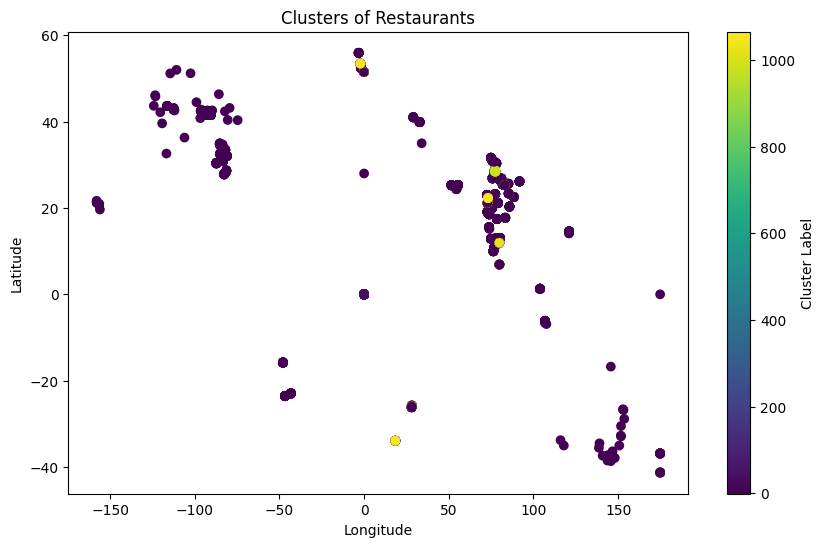

In [45]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# Step 1: Prepare data for clustering
coords = df[['Latitude', 'Longitude']].values

# Step 2: Apply DBSCAN
db = DBSCAN(eps=0.001, min_samples=2).fit(coords)
labels = db.labels_

# Step 3: Add cluster labels to DataFrame
df['Cluster'] = labels

# Step 4: Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Cluster'], cmap='viridis', label='Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Restaurants')
plt.colorbar(label='Cluster Label')
plt.show()


### Task 4 : Restaurant Chains

- Identify if there are any restaurant chains present in the dataset.

In [46]:
# Step 1: Group by restaurant name and count occurrences
restaurant_counts = df['Restaurant Name'].value_counts()

# Step 2: Identify chains (restaurants that appear more than once)
restaurant_chains = restaurant_counts[restaurant_counts > 1]

# Display the results
print("Restaurant chains found in the dataset:")
print(restaurant_chains)

Restaurant chains found in the dataset:
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
San Carlo            2
Gymkhana             2
Dishoom              2
Timboo Cafe          2
D�_vero��lu          2
Name: count, Length: 734, dtype: int64


- Analyze the ratings and popularity of different restaurant chains.

                Restaurant Name  Aggregate rating  Votes
663             Barbeque Nation          4.353846  28142
101   AB's - Absolute Barbecues          4.825000  13400
6943                       Toit          4.800000  10934
785                   Big Chill          4.475000  10853
2297                 Farzi Cafe          4.366667  10098
...                         ...               ...    ...
2956              Hookie Dookie          0.000000      0
7320               Xpert Bakers          0.000000      0
7323                   Yaadgaar          0.000000      0
92        A Patisseries Gallery          0.000000      0
99                A1 Restaurant          0.000000      0

[7446 rows x 3 columns]


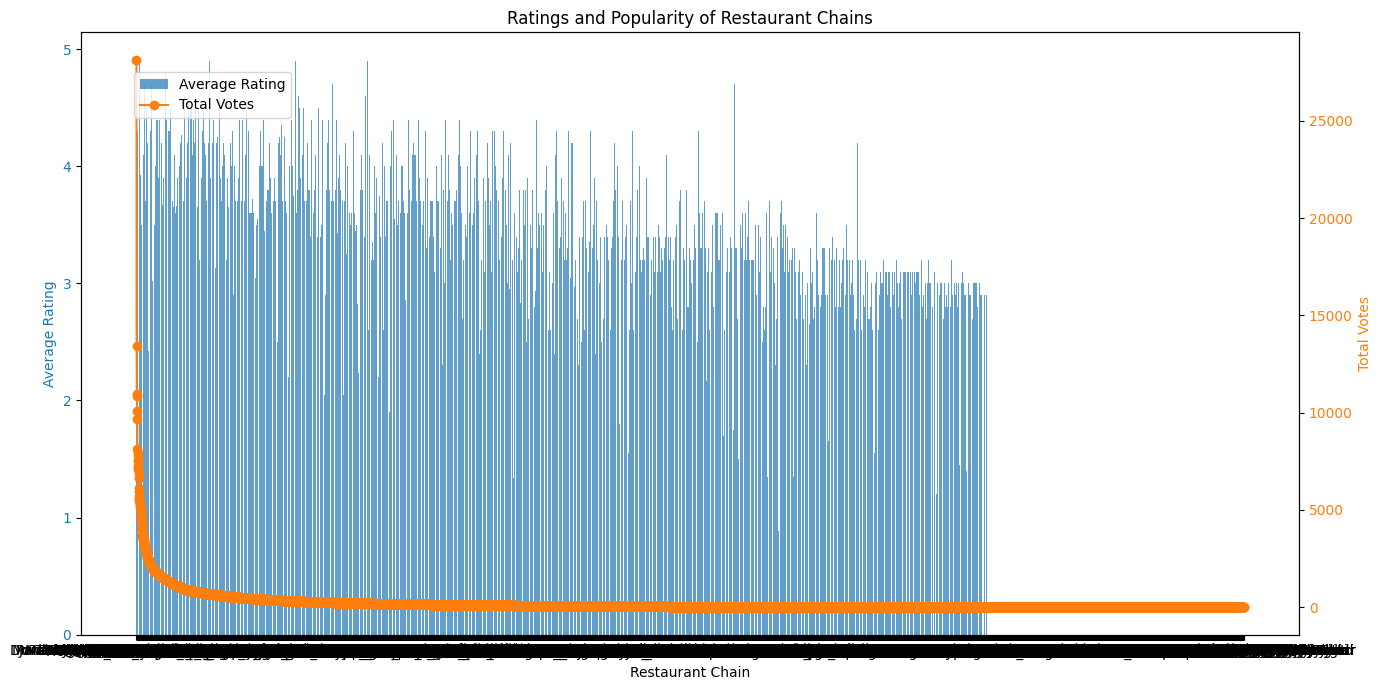

In [47]:
# Step 1: Group by 'Restaurant' to aggregate ratings and popularity
chain_stats = df.groupby('Restaurant Name').agg({
    'Aggregate rating': 'mean',  # Average rating
    'Votes': 'sum'     # Total number of votes
}).reset_index()

# Sort the DataFrame by total votes for better visualization
chain_stats = chain_stats.sort_values(by='Votes', ascending=False)

# Display the results
print(chain_stats)

# Step 2: Visualize the results

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot ratings on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Restaurant Chain')
ax1.set_ylabel('Average Rating', color=color)
ax1.bar(chain_stats['Restaurant Name'], chain_stats['Aggregate rating'], color=color, alpha=0.7, label='Average Rating')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the votes
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Total Votes', color=color)
ax2.plot(chain_stats['Restaurant Name'], chain_stats['Votes'], color=color, marker='o', label='Total Votes')
ax2.tick_params(axis='y', labelcolor=color)

# Title and legends
plt.title('Ratings and Popularity of Restaurant Chains')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.show()
